# TRANSFORM DOMAIN

Details in images are generally found in
* high frequencies
* very rapid alterations of dark and brigh areas

One of the possibilities to determine how much detail we want in a picture is to change the domain of analysis.

To move from the spatial domain (pixels) to the frequency domain we use **transforms**.

A transform is a class of unary matrices that are used to represent signals

* A 1-D signal can be expressed as the combination of a number of orthonormal basis functions

* A 2-D signal can be expressed as the combination of a number of basis matrices called basis images

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

im = cv2.imread('lena_color.jpg', 0)
im1 = np.float32(im)/255.0

## Fourier Transform

The Fourier transform decomposes (using convolutions) a function of time or space (a signal) into its constituent frequencies.

Most of the Fourier transform is concentrated in the center (low frequencieS, DC components).

Deleting the central frequencies, after we use fftshift (and so the DC components), severely affects the image with major quality loss.

If you do not use fftshift, the high frequencies (related to textures ecc) will be located in the image center and can be exploited to target or embed watermarks.

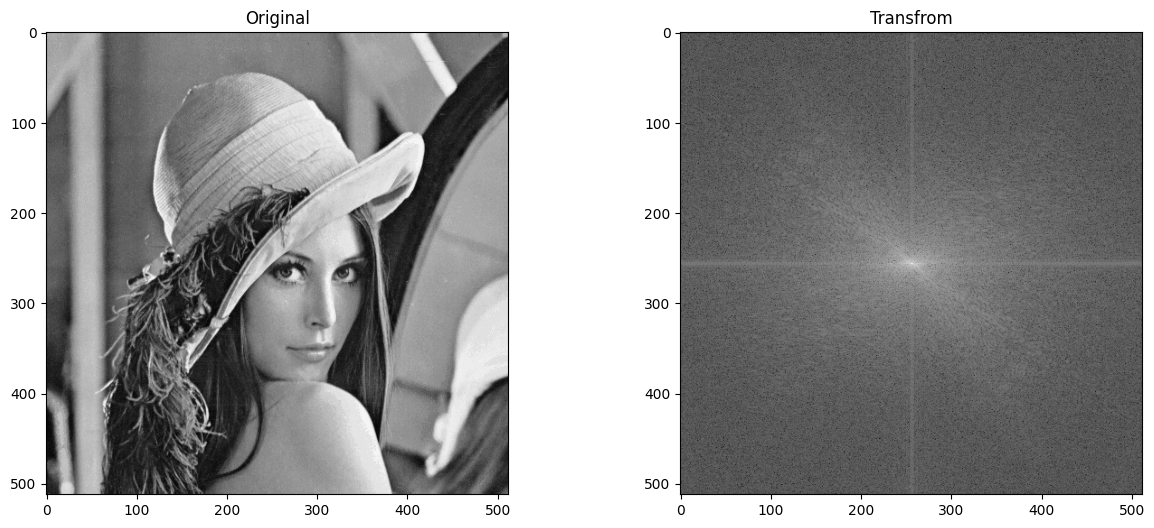

In [2]:
transform = np.fft.fftshift(np.fft.fft2(im))

# Show orginal and edited images side by side
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Original')
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.title('Transfrom')
plt.imshow(np.log(abs(transform)), cmap='gray')
plt.show()

### Inverse FFT

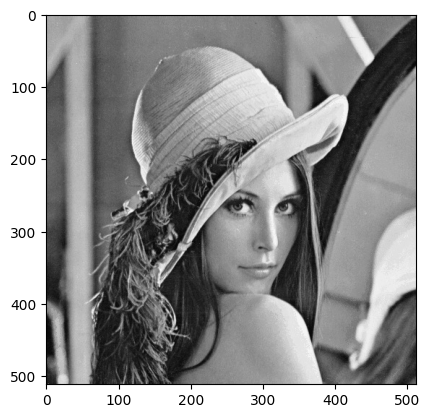

In [3]:
transform = (np.fft.fft2(im))

plt.imshow(np.real(np.fft.ifft2(transform)), 'gray')


## Discrete Cosine Transform

The Discrete Cosine Transform (DCT) express a signal into a series of cosine and sine. It is good for digital processing, band optimization and data compression (JPEG COMPRESSION!!).

Why Cosine? you need only a few of them to approximate a signal.

DCT has many advantages:

* it is real and orthgonal: the inverse matrix corresponds to the transposed matrix

* it is fast

* it allows an optimal energy allocation if data is correlated

* it helps locating useful areas to embed or target watermark (!)

Finally, all (or almost) our data and media transmission are DCT-based. Imagine 2020 without it.

DCT is as important as pop, in the series "This is Us", the authors dedicated an entire [episode (this is the trailer)](https://www.youtube.com/watch?v=W29r-zJtqcY&t=176s) to Nasid Ahmed, the father of the DCT.


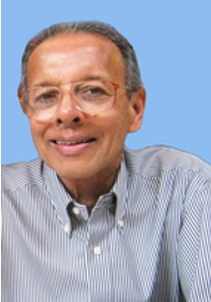


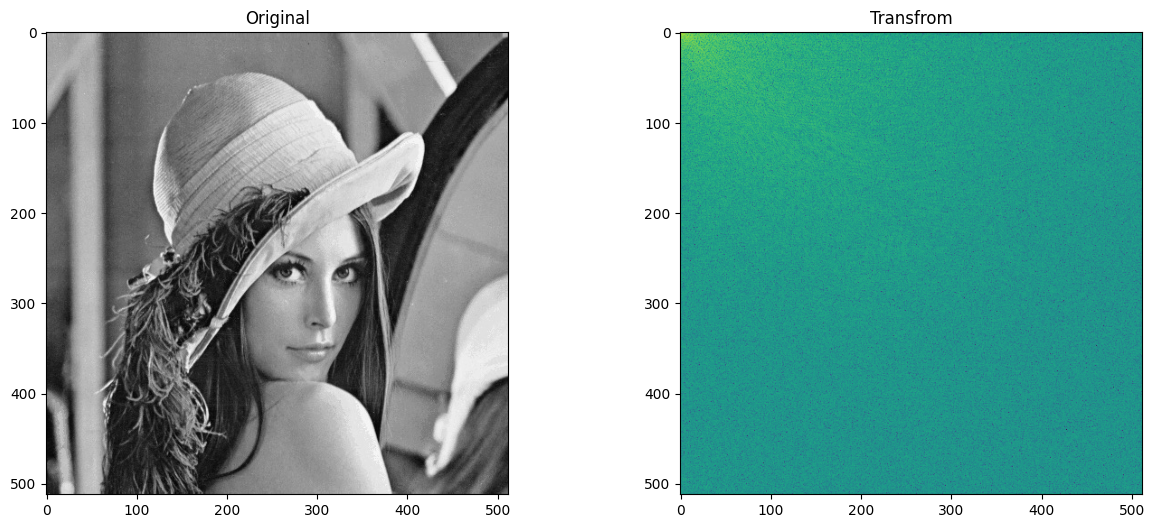

In [4]:
from scipy.fft import dct, idct

transform =  dct(dct(im,axis=0, norm='ortho'),axis=1, norm='ortho')

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Original')
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.title('Transfrom')
plt.imshow(np.log(abs(transform)))
plt.show()

### Inverse DCT

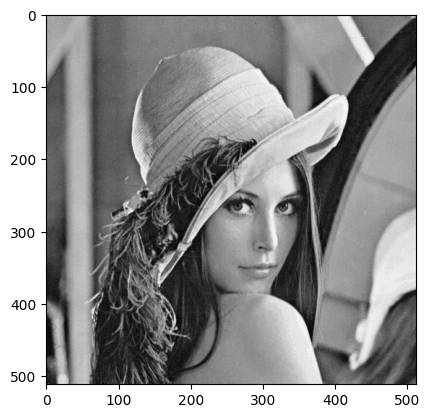

In [11]:
idct2 = np.uint8(idct(idct(transform,axis=1, norm='ortho'),axis=0, norm='ortho'))
plt.imshow(idct2, 'gray')


## Wavelet transform

The Wavelet transform can either be **continuous** or **discrete**. For images we typically use the Discrete Wavelt Transform (DWT), which uses differnt filters to analyse the signal at different levels:

* high-pass filters to analyse high frequencies
* low-pass filters to analyse low frequencies

The main properties of DWT are
* it is real, multiscale and multiresolution
* it is well suited to represent the Human Visual System (HVS) thanks to its multiresolution properties
* allows for localized frequency analysis
* decomposes a discrete signal into different frequency componens allowing for multi-resolution analysis

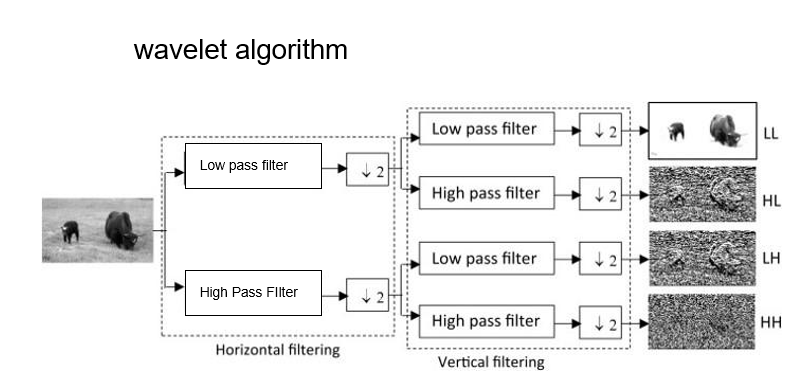

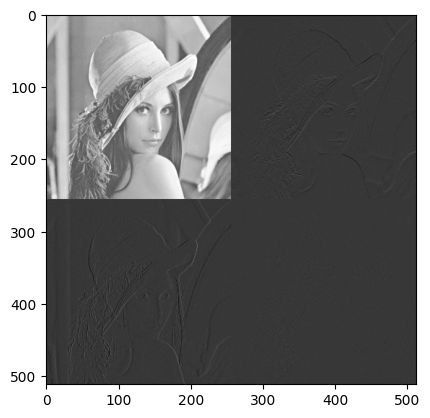

In [12]:
import pywt
coeffs2 = pywt.dwt2(im, 'haar')
LL, (LH, HL, HH) = coeffs2

# Show components
blank_image = np.zeros((512,512), np.float32)
blank_image[:256, :256] = LL
blank_image[:256, 256:] = LH
blank_image[256:, :256] = HL
blank_image[256:, 256:] = HH

plt.imshow(blank_image, 'gray')

### Inverse DWT

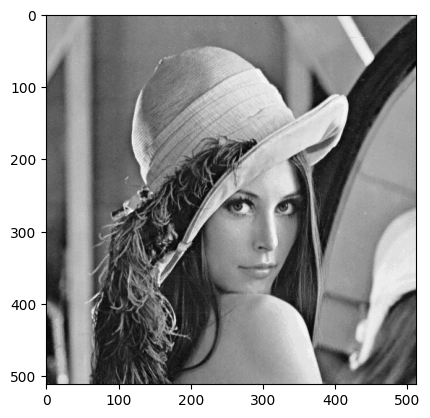

In [13]:
IDWT = pywt.idwt2((LL, (LH, HL, HH)), 'haar')
plt.imshow(IDWT, 'gray')

## Additional Note

DWT allows to further decompose the DC component. You can exploit this to "play" some sort "matrioska" game to hide your watermark.

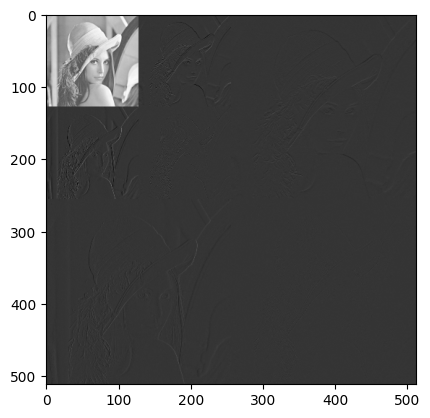

In [14]:
import pywt
coeffs2_2 = pywt.dwt2(LL, 'haar')
LL2, (LH2, HL2, HH2) = coeffs2_2

blank_image = np.zeros((512,512), np.float32)
blank_image[:128, :128] = LL2
blank_image[:128, 128:256] = LH2
blank_image[128:256, :128] = HL2
blank_image[128:256, 128:256] = HH2
blank_image[:256, 256:] = LH
blank_image[256:, :256] = HL
blank_image[256:, 256:] = HH

# Show components
plt.imshow(blank_image, 'gray')